In [1]:
# import the necessary libraries 
import json 
import numpy as np 
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_json("/Users/santhoshrajesh/Desktop/Datasets/sarcasm.json")
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
sentences = data.headline
sentences

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [4]:
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer

TfidfVectorizer(stop_words='english')

In [5]:
documents = vectorizer.fit_transform(sentences)
print(documents.shape)
print(documents)

(26709, 25012)
  (0, 20116)	0.3954557715571661
  (0, 14242)	0.33955222134443497
  (0, 4459)	0.3305537596357227
  (0, 2483)	0.2265042264786199
  (0, 19700)	0.2694549095486519
  (0, 21640)	0.3348025159191706
  (0, 4325)	0.34792546297375465
  (0, 21376)	0.2876183544167277
  (0, 23849)	0.4234075466635317
  (1, 24734)	0.32023035326953897
  (1, 2327)	0.2697609081004893
  (1, 14497)	0.36255338079494787
  (1, 16837)	0.28660896832704597
  (1, 22436)	0.41565221980647804
  (1, 3698)	0.35962909146954675
  (1, 18761)	0.369087116495562
  (1, 19083)	0.41565221980647804
  (2, 9675)	0.44182899882456933
  (2, 22410)	0.2726889860031312
  (2, 4383)	0.3988974518147157
  (2, 19845)	0.30856823222698637
  (2, 24327)	0.3587907986848685
  (2, 20771)	0.2752088566047012
  (2, 8279)	0.32139247301907276
  (2, 21205)	0.3223338138871314
  :	:
  (26703, 4143)	0.33136985940831043
  (26703, 9618)	0.3113788668741773
  (26704, 14508)	0.5487943931197224
  (26704, 16843)	0.45059593650184765
  (26704, 8152)	0.451711411364591

In [6]:
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(documents.toarray()) 

In [7]:
reduced_data.shape

(26709, 2)

In [8]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [9]:
results = pd.DataFrame() 
results['document'] = sentences 
results['cluster'] = kmeans.labels_ 

In [10]:
results.sample(5)

,document,cluster
17273,"right next door: matthew mcgorry, actor",0
23868,"dad recounts amazing story of how, through qui...",0
375,obama plans to tackle major education inequality,0
1423,crazy cheap deal: fly to 10 countries in 30 da...,0
1425,department of education hires art teacher to s...,0


In [11]:
results['cluster'].value_counts()

0    25064
1     1645
Name: cluster, dtype: int64

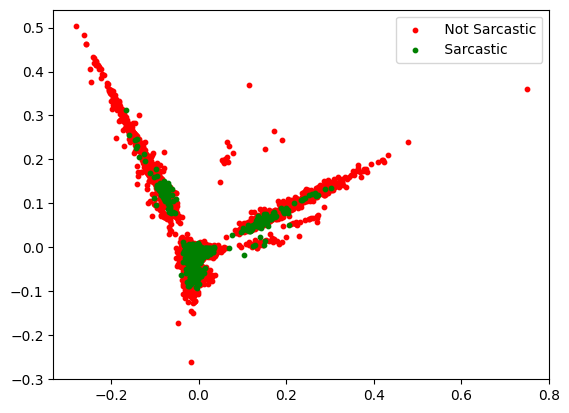

In [12]:
colors = ['red', 'green'] 
cluster = ['Not Sarcastic','Sarcastic'] 
for i in range(num_clusters): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1],  
                s=10, color=colors[i],  
                label=f' {cluster[i]}') 
plt.legend() 
plt.show()